In [ ]:
!pip install qiskit

In [2]:
!pip install qiskit --upgrade

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.6/4.6 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 9.6/9.6 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 241.3/241.3 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 42.2/42.2 MB 904.9 kB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 247.7/247.7 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 54.3/54.3 kB 564.3 kB/s eta 0:00:00
     -------------------------------------- 140.6/140.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 kB 848.1 kB/s eta 0:00:00
     -----------------

In [4]:
from qiskit.transpiler.passes.synthesis import SolovayKitaev
from qiskit.transpiler.passes import SolovayKitaevSynthesis, UnitarySynthesis
from qiskit.quantum_info import Operator
from qiskit import *
import numpy as np
from astropy.coordinates import cartesian_to_spherical
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.circuit.library import TGate, HGate, TdgGate
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import state_fidelity

ModuleNotFoundError: No module named 'qiskit'

In [155]:
def solovay_kiteav_decomposition(qc):
    """
    INPUT
    ------
    qc : QuantumCircuit
    
    OUTPUT
    ------
    tuple : (decomposed circuit, depth)
    """
    skd = SolovayKitaev(recursion_degree=3)
    dc = skd(qc)
    return dc, dc.depth()

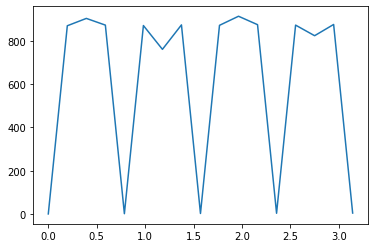

In [66]:
plt.plot(ang_list, depth_list)

In [31]:
basis_gates = ['h', 't']
skd = UnitarySynthesis(method = 'sk', basis_gates = basis_gates, approximation_degree = 0.5, synth_gates = 'c')
dc = skd(c)
dc.draw()

┌───┐
q: ┤ Y ├
   └───┘

In [26]:
?UnitarySynthesis

In [43]:
c = QuantumCircuit(2)
c.y(0)
c.cx(0,1)
c.decompose(gates_to_decompose =[HGate(), TGate()]).draw()

┌───┐     
q_0: ┤ Y ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [81]:
sim = Aer.get_backend('statevector_simulator')
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)
qc1.rz(0,0)
qc1_state = execute(qc1, sim).result().get_statevector(qc1)
qc2.rx(np.pi/2,0)
qc2_state = execute(qc2, sim).result().get_statevector(qc2)
fid = np.round(state_fidelity(qc1_state, qc2_state),3)

In [92]:
for ang in np.arange(0, 2*np.pi, np.pi/10):
    equi_qc = QuantumCircuit(1)
    equi_qc.ry(ang, 0)
    equi_qc_state = execute(equi_qc, sim).result().get_statevector(equi_qc)
    equi_fid_1 = np.round(state_fidelity(qc1_state, equi_qc_state),3)
    equi_fid_2 = np.round(state_fidelity(qc2_state, equi_qc_state),3)
#     if equi_fid_1 == fid and equi_fid_2 == fid:


plot_bloch_multivector(qc2_state)

(<Figure size 288x288 with 1 Axes>, <Figure size 288x288 with 1 Axes>)

In [144]:
# https://stackoverflow.com/questions/9600801/evenly-distributing-n-points-on-a-sphere
import math
def fibonacci_sphere(samples=1000):

    rz_angle,rx_angle, x_points, y_points, z_points  = [],[],[],[],[]
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        x_points.append(x)
        y_points.append(y)
        z_points.append(z)
        sphe_coor = cartesian_to_spherical(x, y, z)
        rz_angle.append(sphe_coor[1].radian+np.pi/2)
        rx_angle.append(sphe_coor[2].radian)
    return rz_angle, rx_angle, x_points, y_points, z_points

In [146]:
fibonacci_sphere(4)

([1.5707963267948966,
  2.261212834529893,
  0.3505060641227318,
  1.5707963267948966],
 [1.5707963267948966, 2.694495654559817, 4.95480345694593, 4.71238898038469],
 [0.0, -0.695198045233462, 0.08242576373001424, 0.0],
 [1.0, 0.33333333333333337, -0.33333333333333326, -1.0],
 [0.0, 0.6368583569306933, -0.9391990642895748, 0.0])

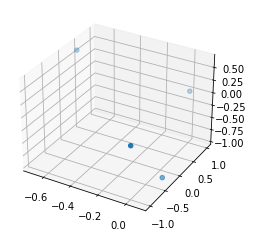

In [147]:
import mpl_toolkits.mplot3d
points = 4
plt.figure().add_subplot(111, projection='3d').scatter(fibonacci_sphere(points)[2],
                                                       fibonacci_sphere(points)[3],
                                                      fibonacci_sphere(points)[4]);
plt.show()

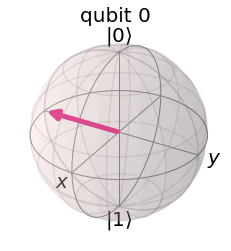

In [138]:
rz_ang_list, rx_ang_list = fibonacci_sphere(4)[0], fibonacci_sphere(4)[1]
equiv_qc = QuantumCircuit(1)
equiv_qc.rz(rz_ang_list[0],0)
equiv_qc.rx(rx_ang_list[0],0)
qc1_state = execute(equiv_qc, sim).result().get_statevector(equiv_qc)
plot_bloch_multivector(qc1_state)

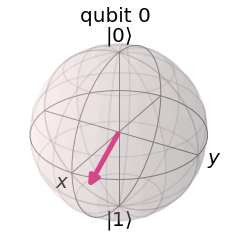

In [139]:
equiv_qc = QuantumCircuit(1)
equiv_qc.rz(rz_ang_list[1],0)
equiv_qc.rx(rx_ang_list[1],0)
qc1_state = execute(equiv_qc, sim).result().get_statevector(equiv_qc)
plot_bloch_multivector(qc1_state)

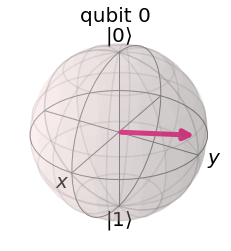

In [140]:
equiv_qc = QuantumCircuit(1)
equiv_qc.rz(rz_ang_list[2],0)
equiv_qc.rx(rx_ang_list[2],0)
qc1_state = execute(equiv_qc, sim).result().get_statevector(equiv_qc)
plot_bloch_multivector(qc1_state)

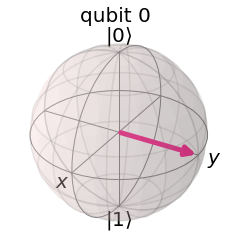

In [141]:
equiv_qc = QuantumCircuit(1)
equiv_qc.rz(rz_ang_list[3],0)
equiv_qc.rx(rx_ang_list[3],0)
qc1_state = execute(equiv_qc, sim).result().get_statevector(equiv_qc)
plot_bloch_multivector(qc1_state)

In [164]:
points = 200
rz_ang_list, rx_ang_list = fibonacci_sphere(points)[0], fibonacci_sphere(points)[1]

depth_list = []
for p in range(points):
    equiv_qc = QuantumCircuit(1)
    equiv_qc.rz(rz_ang_list[p],0)
    equiv_qc.rx(rx_ang_list[p],0)
    _, depth = solovay_kiteav_decomposition(equiv_qc)
#     print(depth)
    depth_list.append(depth)

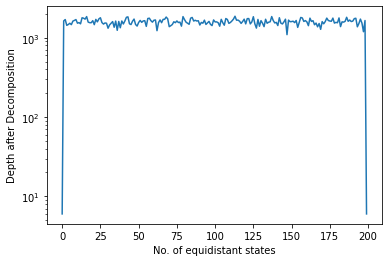

In [165]:
plt.semilogy(depth_list)
plt.xlabel('No. of equidistant states')
plt.ylabel('Depth after Decomposition')
plt.savefig('equidistant_state_depth.png')